In [2]:
from math import exp
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import markers
import os
cm = 1/2.54
############### Un po' di formattazione ################
plt.rcParams["figure.figsize"] = (30*cm, 24*cm)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
def Psucc(Rrx, Rtx, Rint, Trx, Ttx, Tint, Nd):
    Prx = (Rrx*Trx)*exp(-Rrx*Trx)
    Ptx = (Rtx*Ttx)*exp(-Rtx*Ttx)
    Pint = (Rint*Tint)*exp(-Rrx*Tint)
    return Prx*Ptx*(1-Ptx)**(Nd-2) * (1-Pint) 

In [4]:
def comp_plot(Trx = 1e-3, Ttx = 1e-3, Tint = 1e-4, Rint = [0.1], nds = [2,4,8,16,32,64], Rs=range(100)):
    res = {}
    for rint in Rint:
        for R in Rs:
            for Nd in nds:
                try:
                    res[Nd].append(Psucc(R,R,rint,Trx,Ttx,Tint,Nd))
                except:
                    res[Nd] = [Psucc(R,R,rint,Trx,Ttx,Tint,Nd)]
    return Rs, res

C:\Users\ingfr\AppData\Local\Temp\ipykernel_3792\310150155.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ymin=0.0)


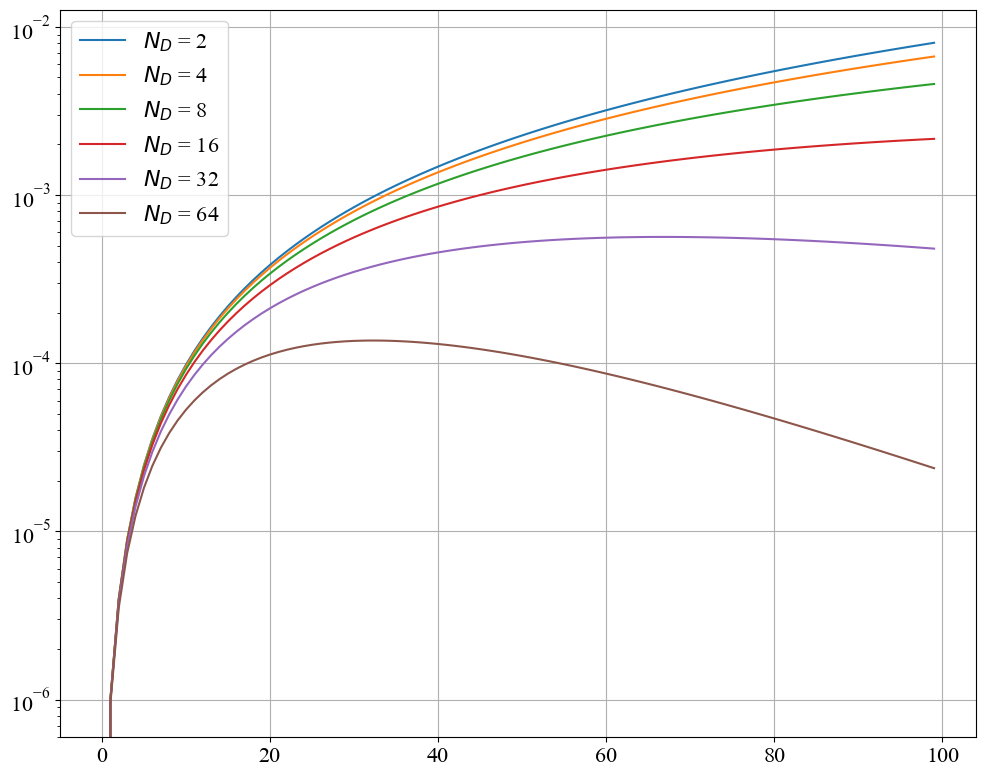

In [14]:
Rs, res = comp_plot(Rint = [0.0])
for N in res:
    plt.semilogy(Rs, res[N],label=f"$N_D$ = {N}")

plt.ylim(ymin=0.0)
plt.legend()
plt.grid()
plt.show()

In [6]:
rints = [0,10,20,30,40,50,60,70,80,90,100]
rs, res2 = comp_plot(Rint = rints, Rs=[10])


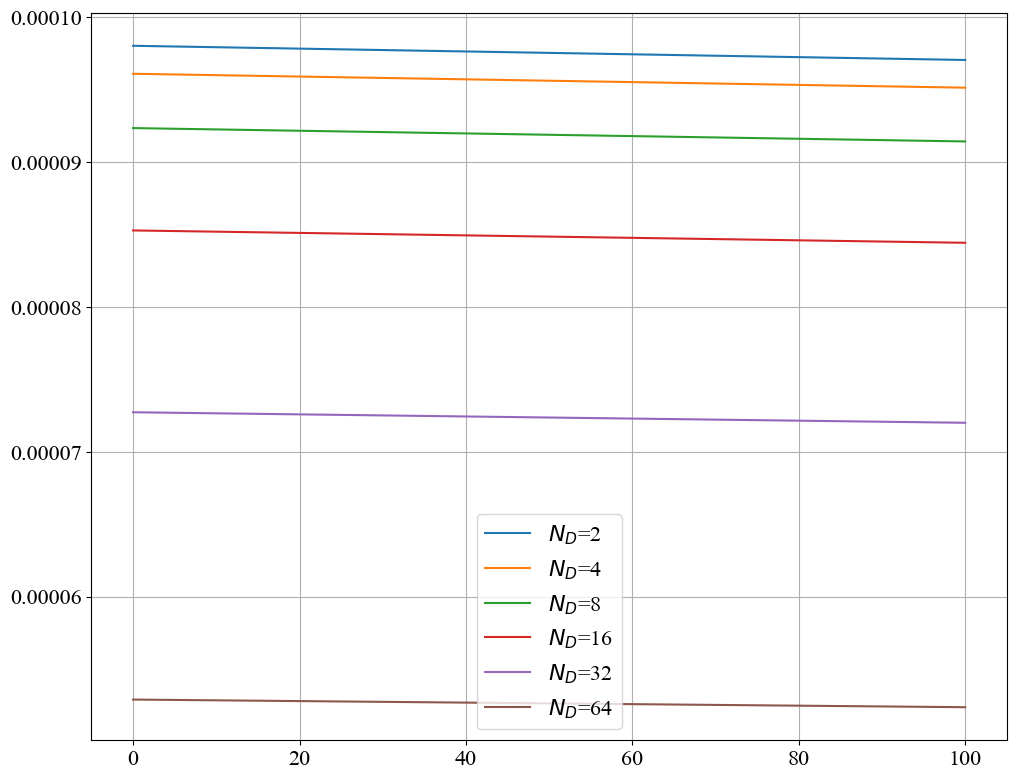

In [8]:
for r in res2:
    plt.plot(rints,res2[r], label=f"$N_D$={r}")
    
plt.grid()
plt.legend()
plt.show()

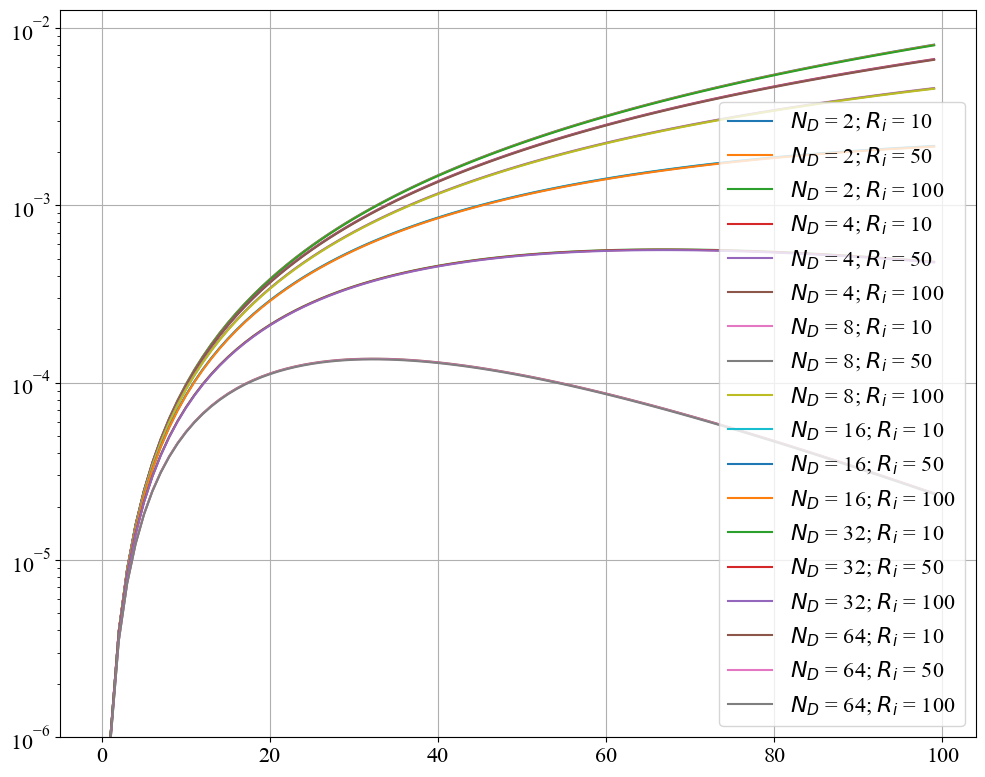

In [9]:
Rs3, res3 = comp_plot(Rint=[10,50,100])
for N in res3:
    plt.semilogy(Rs3, res3[N][0:100],label=f"$N_D$ = {N}; $R_i$ = 10")
    plt.semilogy(Rs3, res3[N][100:200],label=f"$N_D$ = {N}; $R_i$ = 50")
    plt.semilogy(Rs3, res3[N][200:],label=f"$N_D$ = {N}; $R_i$ = 100")

plt.ylim(ymin=1e-6)
plt.legend()
plt.grid()
plt.show()